In [12]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

filename = "ratings.csv"

#df = pd.read_excel(io=file_name, sheet_name=sheet)
df = pd.read_csv(filename)
df

,ID,Start time,Completion time,Email,Name,Total points,Quiz feedback,Enter your name please\n,Points - Enter your name please\n,Feedback - Enter your name please\n,...,Points - Ratatouille,Shrek,Feedback - Shrek,Points - Shrek,Black Panther,Feedback - Black Panther,Points - Black Panther,A Beautiful Mind\n,Feedback - A Beautiful Mind\n,Points - A Beautiful Mind\n
0,1,4/21/22 11:29:07,4/21/22 11:29:22,anonymous,NaN,NaN,NaN,p1,NaN,NaN,...,NaN,5,NaN,NaN,6,NaN,NaN,6,NaN,NaN
1,2,4/21/22 11:29:27,4/21/22 11:29:40,anonymous,NaN,NaN,NaN,p2,NaN,NaN,...,NaN,8,NaN,NaN,10,NaN,NaN,10,NaN,NaN
2,3,4/21/22 11:29:42,4/21/22 11:29:59,anonymous,NaN,NaN,NaN,p3,NaN,NaN,...,NaN,4,NaN,NaN,9,NaN,NaN,8,NaN,NaN


In [13]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name', 'Total points',
       'Quiz feedback', 'Enter your name please\n',
       'Points - Enter your name please\n',
       'Feedback - Enter your name please\n', 'Avengers', 'Points - Avengers',
       'Feedback - Avengers', 'Casablanca', 'Feedback - Casablanca',
       'Points - Casablanca', 'Hidden Figures', 'Feedback - Hidden Figures',
       'Points - Hidden Figures', 'Spider-Man: No Way Home',
       'Feedback - Spider-Man: No Way Home',
       'Points - Spider-Man: No Way Home', 'A Quiet Place',
       'Feedback - A Quiet Place', 'Points - A Quiet Place', 'Ratatouille',
       'Feedback - Ratatouille', 'Points - Ratatouille', 'Shrek',
       'Feedback - Shrek', 'Points - Shrek', 'Black Panther',
       'Feedback - Black Panther', 'Points - Black Panther',
       'A Beautiful Mind\n', 'Feedback - A Beautiful Mind\n',
       'Points - A Beautiful Mind\n'],
      dtype='object')

In [28]:
columnsToKeep = ['Avengers', 'Casablanca', 'Hidden Figures','Spider-Man: No Way Home','A Quiet Place', 'Ratatouille','Shrek','Black Panther','A Beautiful Mind\n']
df.fillna(value=0, inplace=True)

names = df["Enter your name please\n"]


dfnew = df[columnsToKeep]
dfnew

,Avengers,Casablanca,Hidden Figures,Spider-Man: No Way Home,A Quiet Place,Ratatouille,Shrek,Black Panther,A Beautiful Mind\n
0,4,5,5,5,5,5,5,6,6
1,8,10,10,10,10,10,8,10,10
2,1,10,10,3,6,4,4,9,8


In [29]:
names

0    p1
1    p2
2    p3
Name: Enter your name please\n, dtype: object

In [30]:
# People comparison
df4 = dfnew.apply(lambda x: x/LA.norm(np.array(x)), axis =1)
B = np.matrix(df4)
pResult = np.matmul(B, np.transpose(B))

print(pResult)

[[1.         0.99567734 0.91713724]
 [0.99567734 1.         0.9124486 ]
 [0.91713724 0.9124486  1.        ]]


In [31]:
df2 = pd.DataFrame(pResult)
df2 = df2.apply(lambda x: round(x,3), axis =0)

df2.columns = names
df2['Names'] = names
df2 = df2.set_index('Names')
df2

Enter your name please,p1,p2,p3
Names,,,
p1,1.000,0.996,0.917
p2,0.996,1.000,0.912
p3,0.917,0.912,1.000


<AxesSubplot:xlabel='Enter your name please\n', ylabel='Names'>

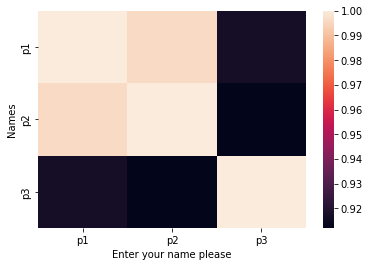

In [32]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df2)

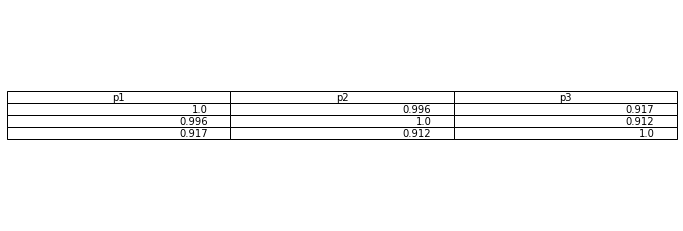

In [33]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

#df = pd.DataFrame(np.random.random((10,3)), columns = ("col 1", "col 2", "col 3"))


fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df2.values,colLabels=df2.columns,loc='center')

pp = PdfPages("people.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [23]:
# Movie comparison
df3 = dfnew.apply(lambda x: x/LA.norm(np.array(x)), axis =0)
A = np.matrix(df3)
mResult = np.matmul(np.transpose(A), A)

In [9]:
df2 = pd.DataFrame(mResult)
df2 = df2.apply(lambda x: round(x,3), axis =0)

df2.columns = columnsToKeep
df2['Movie'] = columnsToKeep
df2

,Avengers,Black Panther,Batman,Step Brothers,Shrek,The Godfather II,Frozen,Hidden Figures,Good Will Hunting,Casablanca,Movie
0,1.000,0.966,0.956,0.888,0.923,0.862,0.828,0.816,0.874,0.759,Avengers
1,0.966,1.000,0.975,0.893,0.921,0.873,0.793,0.852,0.886,0.770,Black Panther
2,0.956,0.975,1.000,0.894,0.931,0.936,0.837,0.867,0.923,0.821,Batman
3,0.888,0.893,0.894,1.000,0.865,0.801,0.809,0.771,0.858,0.777,Step Brothers
4,0.923,0.921,0.931,0.865,1.000,0.884,0.833,0.823,0.857,0.751,Shrek
5,0.862,0.873,0.936,0.801,0.884,1.000,0.790,0.868,0.886,0.845,The Godfather II
6,0.828,0.793,0.837,0.809,0.833,0.790,1.000,0.809,0.831,0.774,Frozen
7,0.816,0.852,0.867,0.771,0.823,0.868,0.809,1.000,0.868,0.875,Hidden Figures
8,0.874,0.886,0.923,0.858,0.857,0.886,0.831,0.868,1.000,0.845,Good Will Hunting
9,0.759,0.770,0.821,0.777,0.751,0.845,0.774,0.875,0.845,1.000,Casablanca


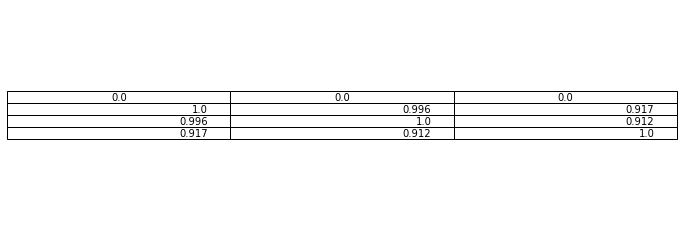

In [24]:
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df2.values,colLabels=df2.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("movies.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

<AxesSubplot:xlabel='Feedback - Enter your name please\n', ylabel='Names'>

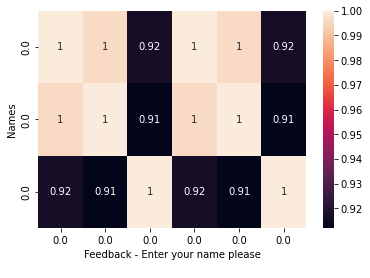

In [25]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df2[df2.columns[:-1]], annot=True)